# FIFA19 데이터를 통해 선수들의 스탯을 보고 포지션 예측하기 

### 데이터 소개

In [1]:
# 사용할 모듈 불러오기
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 피파 데이터 읽기
fifa_data = pd.read_csv("C:/Users/multi050/fifa_data.csv")

In [3]:
# 데이터 내용보기
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 데이터를 구성하는 정보보기

In [4]:
fifa_data.info()
'''
18207개의 샘플이 있고
54~88까지의 특성이 선수들의 스탯
28~53까지 선수들의 스탯을 종합적으로 평가해서 포지션별 점수 부여
21은 그 선수의 포지션 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

'\n18207개의 샘플이 있고\n54~88까지의 특성이 선수들의 스탯\n28~53까지 선수들의 스탯을 종합적으로 평가해서 포지션별 점수 부여\n21은 그 선수의 포지션 \n'

In [5]:
# 위에서 언급한 선수의 포지션, 포지션별 점수, 스탯을 보여줌
player_position = pd.DataFrame({'Name': fifa_data.Name,'Position':fifa_data.Position,}) # 선수 이름, 포지션
player_Stat = fifa_data.iloc[:,54:88] # 스탯

player_information = pd.concat([player_position,player_Stat],axis=1)
player_information

,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [6]:
fifa_data.iloc[:,28:53]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,...,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2
18203,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,...,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2
18204,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,...,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2
18205,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,...,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2


### 데이터 수정하기

####  1. 특성(스탯) 중에서 분류에 영향을 주지 않는 특성(스탯)을 제거 → 정확도에 조금의 영향 
####  2. 왼쪽 포지션 오른쪽 포지션으로 나누지 않고 하나로 합쳐서 포지션별로 데이터의 수를 증가  → 정확도에 큰 영향
####  3. null값 제거

#### 특성제거

In [7]:
ST=player_information.loc[player_information['Position']=='ST',:]
ST=ST[0:1000]
ST

,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1,Cristiano Ronaldo,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
10,R. Lewandowski,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
16,H. Kane,ST,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,...,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0
23,S. Agüero,ST,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0
36,G. Bale,ST,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,...,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,S. Davies,ST,65.0,64.0,70.0,60.0,65.0,60.0,68.0,65.0,...,70.0,67.0,31.0,44.0,34.0,12.0,16.0,16.0,16.0,6.0
9073,S. Brandstetter,ST,49.0,65.0,65.0,58.0,58.0,62.0,57.0,48.0,...,59.0,63.0,19.0,25.0,16.0,13.0,8.0,14.0,9.0,13.0
9075,D. Samuel,ST,49.0,65.0,67.0,60.0,57.0,70.0,62.0,37.0,...,64.0,62.0,44.0,31.0,28.0,15.0,7.0,16.0,15.0,6.0
9084,Stéfano Pinho,ST,64.0,67.0,52.0,56.0,57.0,73.0,61.0,57.0,...,59.0,60.0,19.0,62.0,62.0,13.0,11.0,9.0,10.0,9.0


In [8]:
CB=player_information.loc[player_information['Position']=='CB',:]
CB=CB[0:1000]
CB

,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
12,D. Godín,CB,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,...,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0
42,S. Umtiti,CB,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,...,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0
73,M. Benatia,CB,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,...,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0
89,N. Otamendi,CB,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,...,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0
102,Naldo,CB,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,...,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11623,Kim Jungya,CB,29.0,47.0,64.0,60.0,31.0,32.0,32.0,31.0,...,30.0,47.0,60.0,68.0,65.0,11.0,14.0,14.0,15.0,7.0
11640,V. Selimović,CB,32.0,21.0,65.0,54.0,26.0,55.0,28.0,30.0,...,41.0,54.0,60.0,62.0,60.0,10.0,11.0,9.0,6.0,9.0
11643,C. Shaughnessy,CB,41.0,31.0,64.0,64.0,40.0,52.0,37.0,38.0,...,44.0,59.0,62.0,63.0,63.0,12.0,12.0,10.0,14.0,12.0
11665,E. Wahlström,CB,43.0,31.0,61.0,50.0,22.0,31.0,40.0,31.0,...,37.0,60.0,59.0,60.0,58.0,3.0,3.0,3.0,3.0,3.0


In [9]:
CM=player_information.loc[player_information['Position']=='CM',:]
CM=CM[0:1000]
CM

,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
67,Thiago,CM,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,...,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0
78,S. Milinković-Savić,CM,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,...,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0
121,Jorginho,CM,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,...,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0
136,I. Gündoğan,CM,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,...,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0
161,N. Keïta,CM,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,...,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15244,P. Mbodji,CM,38.0,54.0,48.0,64.0,27.0,58.0,40.0,35.0,...,36.0,41.0,28.0,63.0,48.0,15.0,9.0,14.0,12.0,6.0
15253,H. Heath,CM,50.0,39.0,54.0,66.0,45.0,59.0,53.0,45.0,...,62.0,55.0,55.0,45.0,39.0,12.0,7.0,14.0,10.0,9.0
15256,T. Domgjoni,CM,36.0,39.0,58.0,61.0,38.0,57.0,53.0,33.0,...,40.0,58.0,59.0,59.0,62.0,6.0,14.0,9.0,14.0,13.0
15267,K. Monlouis,CM,45.0,36.0,61.0,74.0,45.0,61.0,42.0,49.0,...,53.0,53.0,56.0,54.0,62.0,7.0,14.0,14.0,15.0,7.0


In [10]:
st_score=ST.iloc[:,2:].sum()
st_score

Crossing           53056.0
Finishing          72022.0
HeadingAccuracy    69315.0
ShortPassing       64010.0
Volleys            65661.0
Dribbling          68409.0
Curve              57955.0
FKAccuracy         50886.0
LongPassing        50200.0
BallControl        69878.0
Acceleration       69755.0
SprintSpeed        71157.0
Agility            68471.0
Reactions          68271.0
Balance            63652.0
ShotPower          72787.0
Jumping            71094.0
Stamina            67632.0
Strength           74172.0
LongShots          65026.0
Aggression         59417.0
Interceptions      29741.0
Positioning        72281.0
Vision             60203.0
Penalties          67313.0
Composure          67358.0
Marking            31441.0
StandingTackle     28220.0
SlidingTackle      24638.0
GKDiving           10591.0
GKHandling         10781.0
GKKicking          10793.0
GKPositioning      10560.0
GKReflexes         10578.0
dtype: float64

In [11]:
cb_score=CB.iloc[:,2:].sum()
cb_score

Crossing           42896.0
Finishing          32337.0
HeadingAccuracy    68895.0
ShortPassing       60850.0
Volleys            33652.0
Dribbling          46671.0
Curve              38030.0
FKAccuracy         36643.0
LongPassing        55647.0
BallControl        56827.0
Acceleration       56169.0
SprintSpeed        58199.0
Agility            53482.0
Reactions          63999.0
Balance            53931.0
ShotPower          52913.0
Jumping            70437.0
Stamina            64159.0
Strength           77946.0
LongShots          37305.0
Aggression         70544.0
Interceptions      67903.0
Positioning        36658.0
Vision             43737.0
Penalties          43071.0
Composure          62079.0
Marking            68152.0
StandingTackle     70247.0
SlidingTackle      67874.0
GKDiving           10591.0
GKHandling         10507.0
GKKicking          10629.0
GKPositioning      10669.0
GKReflexes         10555.0
dtype: float64

In [12]:
cm_score=CM.iloc[:,2:].sum()
cm_score

Crossing           58731.0
Finishing          53550.0
HeadingAccuracy    53846.0
ShortPassing       70328.0
Volleys            51412.0
Dribbling          65959.0
Curve              58236.0
FKAccuracy         55260.0
LongPassing        67274.0
BallControl        68671.0
Acceleration       66054.0
SprintSpeed        64996.0
Agility            68729.0
Reactions          64707.0
Balance            70175.0
ShotPower          64838.0
Jumping            63627.0
Stamina            70600.0
Strength           64317.0
LongShots          60303.0
Aggression         63452.0
Interceptions      60028.0
Positioning        60371.0
Vision             66104.0
Penalties          54729.0
Composure          63944.0
Marking            58184.0
StandingTackle     60701.0
SlidingTackle      57163.0
GKDiving           10388.0
GKHandling         10469.0
GKKicking          10561.0
GKPositioning      10665.0
GKReflexes         10567.0
dtype: float64

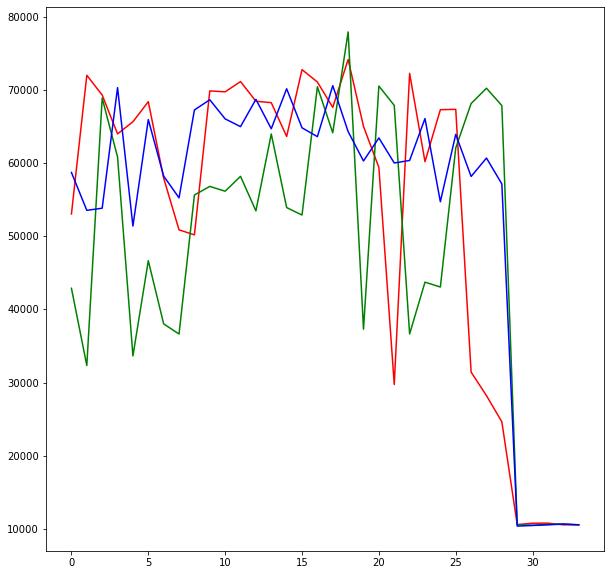

In [13]:
a=np.arange(0,34)
plt.figure(figsize=(10,10))
plt.plot(a,st_score,'r')
plt.plot(a,cb_score,'g')
plt.plot(a,cm_score,'b')
plt.show()

In [14]:
mean=(st_score+cb_score+cm_score)/3

var=((st_score-mean)**2+(cb_score-mean)**2+(cm_score-mean)**2)/3
std=var**(1/2)
std

Crossing            6550.474538
Finishing          16214.209742
HeadingAccuracy     7195.204900
ShortPassing        3940.321589
Volleys            13093.797013
Dribbling           9721.511588
Curve               9459.663031
FKAccuracy          7948.358419
LongPassing         7121.005032
BallControl         5888.461278
Acceleration        5734.786851
SprintSpeed         5292.204897
Agility             7127.471844
Reactions           1869.442698
Balance             6674.286529
ShotPower           8167.470042
Jumping             3375.793536
Stamina             2632.219891
Strength            5745.662538
LongShots          12109.080954
Aggression          4599.369739
Interceptions      16450.789370
Positioning        14806.727442
Vision              9464.751250
Penalties           9899.161491
Composure           2185.850000
Marking            15499.987792
StandingTackle     17988.916977
SlidingTackle      18384.633807
GKDiving              95.695118
GKHandling           138.990008
GKKickin

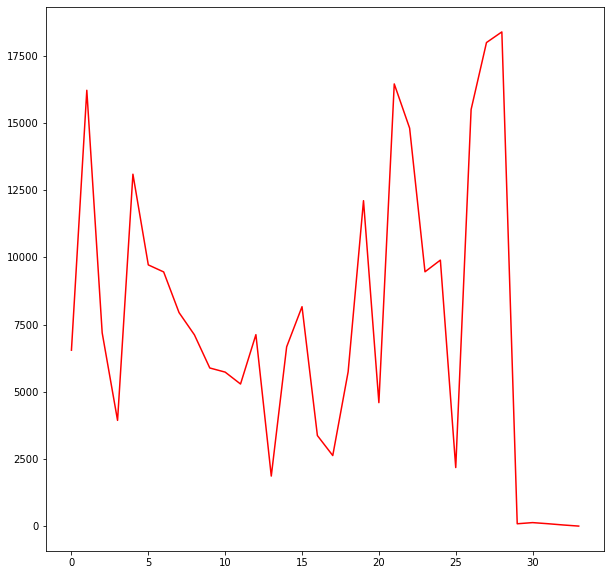

In [15]:
plt.figure(figsize=(10,10))
plt.plot(a,std,'r')
plt.show()

In [16]:
# 분류에 필요없는 특성(스탯) 제거
data_columns = player_information.columns

del player_information[data_columns[5]]  #숏패스
del player_information[data_columns[15]] #반응
del player_information[data_columns[18]] #점핑
del player_information[data_columns[19]] #스태미나
del player_information[data_columns[21]] #멀리차기
del player_information[data_columns[27]] #평정
player_information.columns

Index(['Name', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
       'ShotPower', 'Strength', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

#### 타겟 줄이고 데이터 수 늘리기

In [17]:
# 현재 데이터의 포지션들과 그 개수
player_information.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [18]:
'''
LF(왼쪽 공격수), RF(오른쪽 공격수), CF(중앙 공격수), LS(왼쪽 스트라이커), RS(오른쪽 스트라이커) → ST(스트라이커)

LAM(왼쪽 공격형 미드필더), RAM(오른쪽 공격형 미드필더), → CM(중앙 미드필더)
CAM(중앙 공격형 미드필더), CDM(중앙 수비형 미드필더) → CM(중앙 미드필더)
LDM(왼쪽 수비형 미드필더), RDM(오른쪽 수비형 미드필더) → CM(중앙 미드필더)
LCM(왼쪽 중앙 미드필더), RCM(오른쪽 중앙 미드필더) → CM(중앙 미드필더)

LW(왼쪽 윙어), RW(오른쪽 윙어) → WM(윙 미드필더)
LWB(좌측 윙백), RWB(우측 윙백) → WM(윙 미드필더)
LM(왼쪽 미드필더), RM(오른쪽 미드필더) → WM(윙 미드필더)

LB(왼쪽 수비수), RB(오른쪽 수비수), LCB(왼쪽 중앙 수비수), RCB(오른쪽 중앙 수비수) → CB(중앙 수비수)
'''

player_information.loc[player_information['Position']=='LF', ['Position']] = 'ST'
player_information.loc[player_information['Position']=='RF', ['Position']] = 'ST'
player_information.loc[player_information['Position']=='CF', ['Position']] = 'ST'
player_information.loc[player_information['Position']=='LS', ['Position']] = 'ST'
player_information.loc[player_information['Position']=='RS', ['Position']] = 'ST'

player_information.loc[player_information['Position']=='LAM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='RAM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='CAM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='CDM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='LDM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='RDM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='LCM', ['Position']] = 'CM'
player_information.loc[player_information['Position']=='RCM', ['Position']] = 'CM'

player_information.loc[player_information['Position']=='LW', ['Position']] = 'WM'
player_information.loc[player_information['Position']=='RW', ['Position']] = 'WM'
player_information.loc[player_information['Position']=='LWB', ['Position']] = 'WM'
player_information.loc[player_information['Position']=='RWB', ['Position']] = 'WM'
player_information.loc[player_information['Position']=='LM', ['Position']] = 'WM'
player_information.loc[player_information['Position']=='RM', ['Position']] = 'WM'

player_information.loc[player_information['Position']=='LB', ['Position']] = 'CB'
player_information.loc[player_information['Position']=='RB', ['Position']] = 'CB'
player_information.loc[player_information['Position']=='LCB', ['Position']] = 'CB'
player_information.loc[player_information['Position']=='RCB', ['Position']] = 'CB'


In [19]:
# 변화시킨 데이터의 포지션과 그 개수
player_information.Position.value_counts()

CB    5701
CM    4619
WM    3135
ST    2667
GK    2025
Name: Position, dtype: int64

In [20]:
#null값 존재해서 null값 제거
print("제거 전 : ", len(player_information))
player_information = player_information.dropna() 
print("제거 후 : ", len(player_information))

제거 전 :  18207
제거 후 :  18147


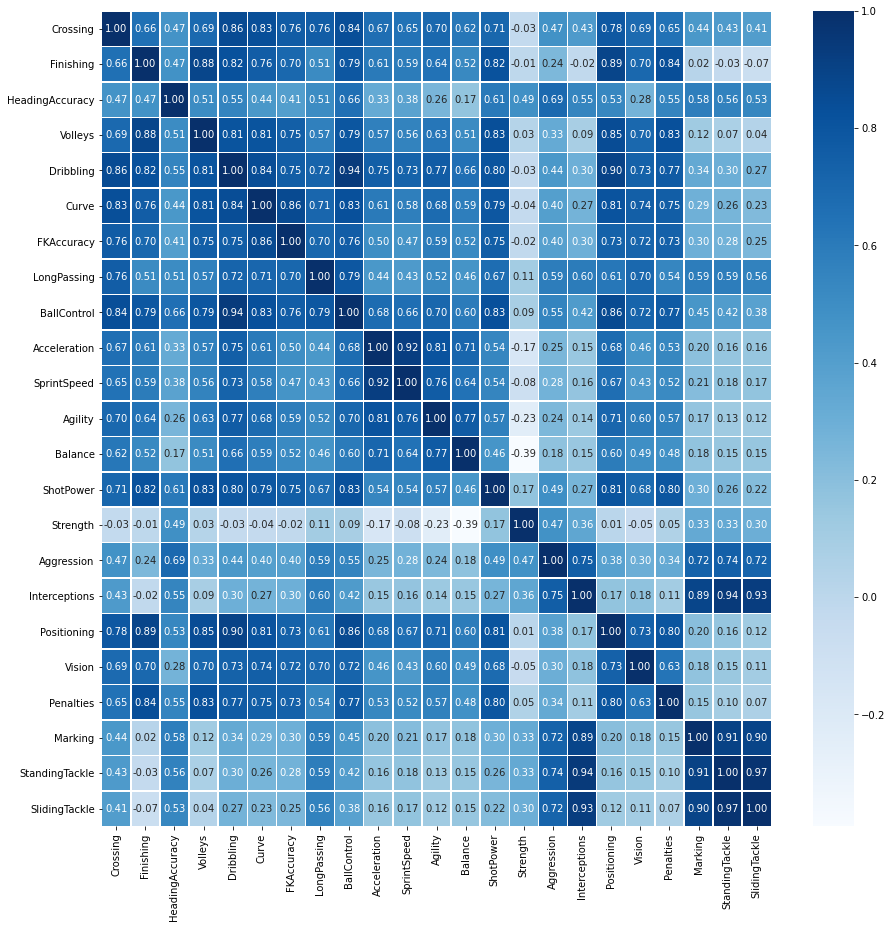

In [21]:
# 히트맵 통해서 특성간 상관관계보기
%matplotlib qt5
plt.figure(figsize=(15,15))
sns.heatmap(data = player_information.iloc[:,2:25].corr(), annot=True, fmt='.2f', linewidth=.5, cmap='Blues')

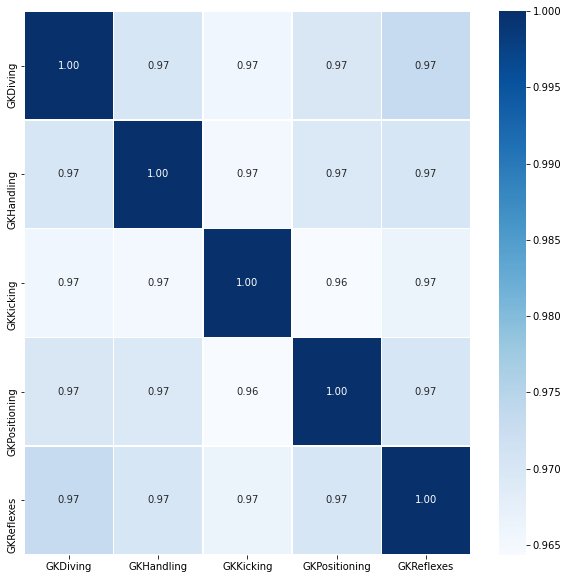

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data = player_information.iloc[:,25:34].corr(), annot=True, fmt='.2f', linewidth=.5, cmap='Blues')


### 훈련데이터, 시험데이터 나누기

In [37]:
# 데이터 나눌 때 유용한 모듈
from sklearn.model_selection import train_test_split

# 훈련데이터 80%, 시험데이터 20%로 나눔
train, test = train_test_split(player_information, test_size=0.2)
print("총 개수 : ", len(player_information))
print("훈련set 개수 : ",len(train))
print("시험set 개수 : ",len(test))

총 개수 :  18147
훈련set 개수 :  14517
시험set 개수 :  3630


In [50]:
X_train = train.iloc[:,2:34]; y_train = train[['Position']].values.ravel() # 훈련데이터에 사용될 특징(스탯)과 예측 값(포지션)

X_test = test.iloc[:,2:34]; y_test = test[['Position']]# 시험데이터에 사용될 특징(스탯)과 예측 값(포지션)

### 훈련

#### RandomForestClassifier로 분류

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train) #values.ravel()로 1차원 배열로 한줄로 만듬

RandomForestClassifier(random_state=42)

In [52]:
#훈련데이터에 대한 정확도
forest_tr=format(forest_clf.score(X_train,y_train));
forest_tr

'1.0'

In [53]:
#시험데이터에 대한 정확도
forest_te=format(forest_clf.score(X_test,y_test));
forest_te

'0.8512396694214877'

#### SVM으로 분류

In [54]:
from sklearn.svm import SVC

svm_clf = SVC(C=10, gamma=0.0001, kernel='rbf')
svm_clf.fit(X_train, y_train)

SVC(C=10, gamma=0.0001)

In [55]:
#훈련데이터에 대한 정확도
svm_tr=format(svm_clf.score(X_train,y_train));
svm_tr

'0.8863401529241579'

In [56]:
#시험데이터에 대한 정확도
svm_te=format(svm_clf.score(X_test,y_test));
svm_te

'0.8672176308539945'

### 모델 세부 튜닝 - 배깅사용

In [57]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=1000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(C=10, gamma=0.0001), max_samples=1000,
                  n_estimators=500, n_jobs=-1)

In [49]:
#훈련데이터에 대한 정확도
bag_tr=format(bag_clf.score(X_train,y_train));
bag_tr

'0.8656747261830957'

In [33]:
#시험데이터에 대한 정확도
bag_te=format(bag_clf.score(X_test,y_test));
bag_te

'0.8465564738292011'

In [34]:
# 실제값과 예측값이 어떻게 다른지 비교
comparison = pd.DataFrame({'실제 값':y_test.values.ravel(),'예측 값':bag_clf.predict(X_test)}) 
comparison[:50]

,실제 값,예측 값
0,CB,CB
1,CB,CB
2,ST,ST
3,CB,WM
4,CM,CM
5,ST,ST
6,ST,ST
7,CM,CM
8,WM,WM
9,CM,CM
